<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/MLSA/PRACTICA01_MLSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

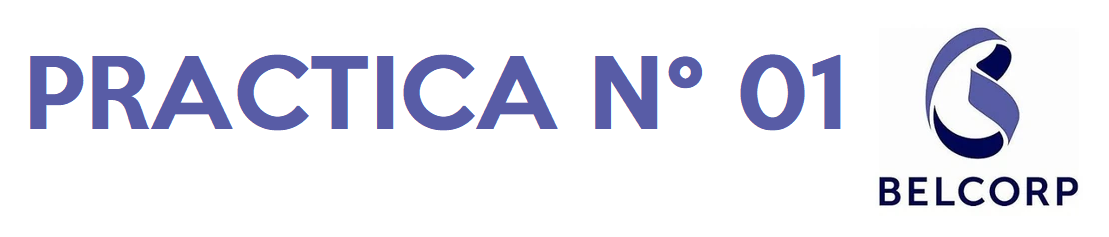

---
**AUTOR:** Henry Paolo Zumaeta Lozano

**MAESTRÍA:** Data Science

**CURSO:** Machine Learning Supervisado Advanced

---

**RESUMEN:**

Predicción con la Data Belcorp usando modelos avanzados, usando emsamblados de modelos optimizados.

---


# CONFIGURACIONES INICIALES

In [ ]:
# @title Entornor R en Colab

# Cargar la extensión de rpy2.ipython
%load_ext rpy2.ipython

In [ ]:
# @title Instalando paquetes de R
# Instalando paquetes de R a usar
%%R
install.packages("DataExplorer")

In [ ]:
# @title Instalando paquetes de python
import subprocess
import sys

def install_if_not_installed(package):
    try:
        __import__(package)
        print(f"El paquete {package} ya está instalado.")
    except ImportError:
        print(f"Instalando el paquete {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"Paquete {package} instalado con éxito.")

# Lista de paquetes a verificar e instalar
packages = ["skimpy", "sweetviz", "MissForest", "imblearn","catboost", "xgboost",
            "lightgbm"]

# Revisar e instalar los paquetes necesarios si no están ya instalados
for package in packages:
    install_if_not_installed(package)


El paquete skimpy ya está instalado.
El paquete sweetviz ya está instalado.
Instalando el paquete MissForest...
Paquete MissForest instalado con éxito.
El paquete imblearn ya está instalado.
El paquete catboost ya está instalado.
El paquete xgboost ya está instalado.
El paquete lightgbm ya está instalado.


In [ ]:
#@title Carga de librerías en Python

# Librerías para análisis de datos y manipulación de DataFrames
import pandas as pd
import numpy as np
from skimpy import skim
import sweetviz as sv

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px  # Gráficos dinámicos, 3D

# Estadística
from scipy.stats import binom, trim_mean, stats
from sklearn.metrics import matthews_corrcoef
from statistics import median, mean, mode

# Machine Learning y preprocesamiento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from missforest.missforest import MissForest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from collections import Counter

# Análisis de Componentes Principales (PCA)
from sklearn.decomposition import PCA

# Modelos de clustering
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, MiniBatchKMeans, AgglomerativeClustering, Birch, MeanShift
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Redes Neuronales
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Evaluaciones de modelos
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Interacción con R
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

# Configuraciones generales
import warnings
warnings.filterwarnings("ignore")
sns.set(style='darkgrid')
%matplotlib inline


In [ ]:
# @title Función para descargar archivos desde drive
import gdown
import pandas as pd
import os

def descargar_archivo_desde_drive(enlace_original, nombre_archivo='archivo'):
    """
    Convierte un enlace de Google Drive a un enlace de descarga directa y descarga el archivo.

    Parámetros:
    enlace_original (str): Enlace de Google Drive en formato de vista previa.
    nombre_archivo (str): Nombre del archivo de salida.

    Retorna:
    str: El nombre del archivo descargado.
    """
    def convertir_enlace_gdown(enlace_original):
        file_id = enlace_original.split('/')[5]
        return f'https://drive.google.com/uc?id={file_id}'

    url = convertir_enlace_gdown(enlace_original)

    try:
        gdown.download(url, nombre_archivo, quiet=False)
        if not os.path.exists(nombre_archivo):
            raise FileNotFoundError("No se pudo descargar el archivo. Puede que no sea accesible.")
    except Exception as e:
        print(f"Error: {e}")
        print("Por favor, verifica los permisos del archivo o usa otro método de compartición.")
        return None
    else:
        return nombre_archivo

In [ ]:
# Uso de la función
URL = 'https://drive.google.com/file/d/1uG7-lni2FIvGWJkjmgQCFuboOAsYBLiD/view?usp=sharing'
nombre_extension = 'data_belcorp.csv' # Colocar su extensión del archivo

# Descargar el archivo
descargar_archivo_desde_drive(URL, nombre_extension)

# Leer el archivo, usar función de acuerdo a su extensión
df_py = pd.read_csv(nombre_extension, na_values=['NA', 'NULL', 'N/A', ''],
                    encoding='latin-1', sep=';')

Downloading...
From: https://drive.google.com/uc?id=1uG7-lni2FIvGWJkjmgQCFuboOAsYBLiD
To: /content/data_belcorp.csv
100%|██████████| 998k/998k [00:00<00:00, 48.6MB/s]


In [ ]:
# Objetos simples de Python a R(Variables, listas, vectores)
%%R -i nombre_extension
library(readr)

df_r_web <- read_delim(nombre_extension,
                       delim = ";",
                       show_col_types = FALSE,
                       na = c("NA", "NULL", "N/A", ""))


# EDA

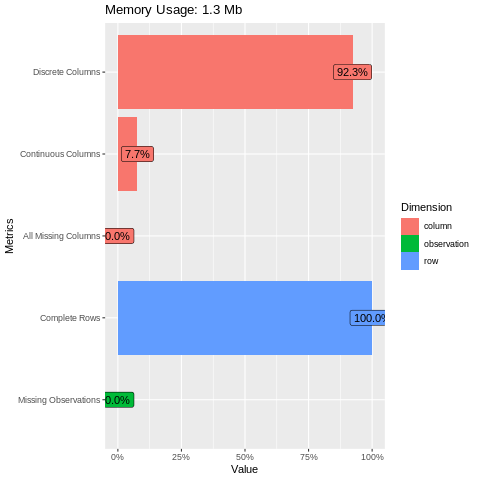

In [ ]:
%%R
library(DataExplorer)
# Resumen de la data gráficamente
plot_intro(df_r_web)

In [ ]:
df_py.head()

,Codigo,Reclutamiento,Ocupacion,Jefe_Hogar,Prioridad_Negocio_VD,Porque_VD,Tiene_TC,Tiene_Prestamo,Venta_Competencia,email,telefono_fijo,telefono_movil,Target
0,A00001,Socia Empresaria,Negociante,Trabajo Oficina Parcial,No tiene Prioridad,Tiempo Libre,SI,SI,SI,Valido,Valido,Valido,0
1,A00002,Socia Empresaria,Tiempo Completo,Negociante,No tiene Prioridad,Incentivos,SI,SI,SI,Valido,Valido,Valido,0
2,A00003,Socia Empresaria,Tiempo Completo,Negociante,No tiene Prioridad,Ganancia,SI,SI,SI,Valido,No Valido,No Valido,0
3,A00004,Otros Medios,Ama de Casa,Construcción y Afines,No tiene Prioridad,Tiempo Libre,NO,NO,SI,Valido,Valido,Valido,1
4,A00005,Socia Empresaria,Ama de Casa,Trabajos Casual,No tiene Prioridad,Tiempo Libre,SI,SI,SI,Valido,Sin Valor,Valido,0


In [ ]:
# Tipos de variables
df_py.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Codigo                8500 non-null   object
 1   Reclutamiento         8500 non-null   object
 2   Ocupacion             8500 non-null   object
 3   Jefe_Hogar            8500 non-null   object
 4   Prioridad_Negocio_VD  8500 non-null   object
 5   Porque_VD             8500 non-null   object
 6   Tiene_TC              8500 non-null   object
 7   Tiene_Prestamo        8500 non-null   object
 8   Venta_Competencia     8500 non-null   object
 9   email                 8500 non-null   object
 10  telefono_fijo         8500 non-null   object
 11  telefono_movil        8500 non-null   object
 12  Target                8500 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 863.4+ KB


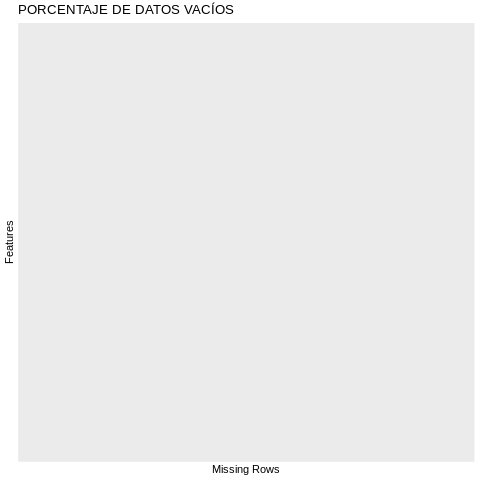

In [ ]:
%%R
library(DataExplorer)

# Valores faltantes o missing
plot_missing(df_r_web,
             missing_only = TRUE,
             title = "PORCENTAJE DE DATOS VACÍOS")

In [ ]:
# Indentificación: cantidad y porcentaje de valores nulo
missing_data = df_py.isnull().sum()
missing_percentage = df_py.isnull().mean() * 100

# df
missing_data_df = pd.DataFrame({
    'MissingValues': missing_data,
    'MissingPercentage': missing_percentage
})

# Solo NaN
missing_data_df = missing_data_df[missing_data_df['MissingValues'] > 0]

print("Columnas con valores nulos:\n", missing_data_df)

Columnas con valores nulos:
 Empty DataFrame
Columns: [MissingValues, MissingPercentage]
Index: []


In [ ]:
df = df_py.iloc[:,1:]

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

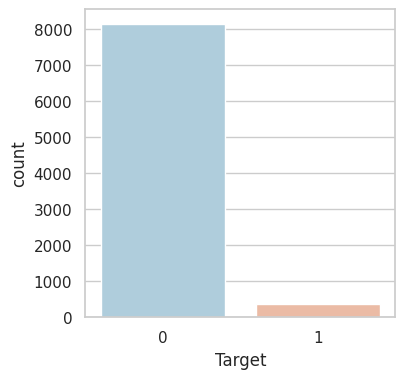

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.countplot(x='Target',data=df,palette='RdBu_r');

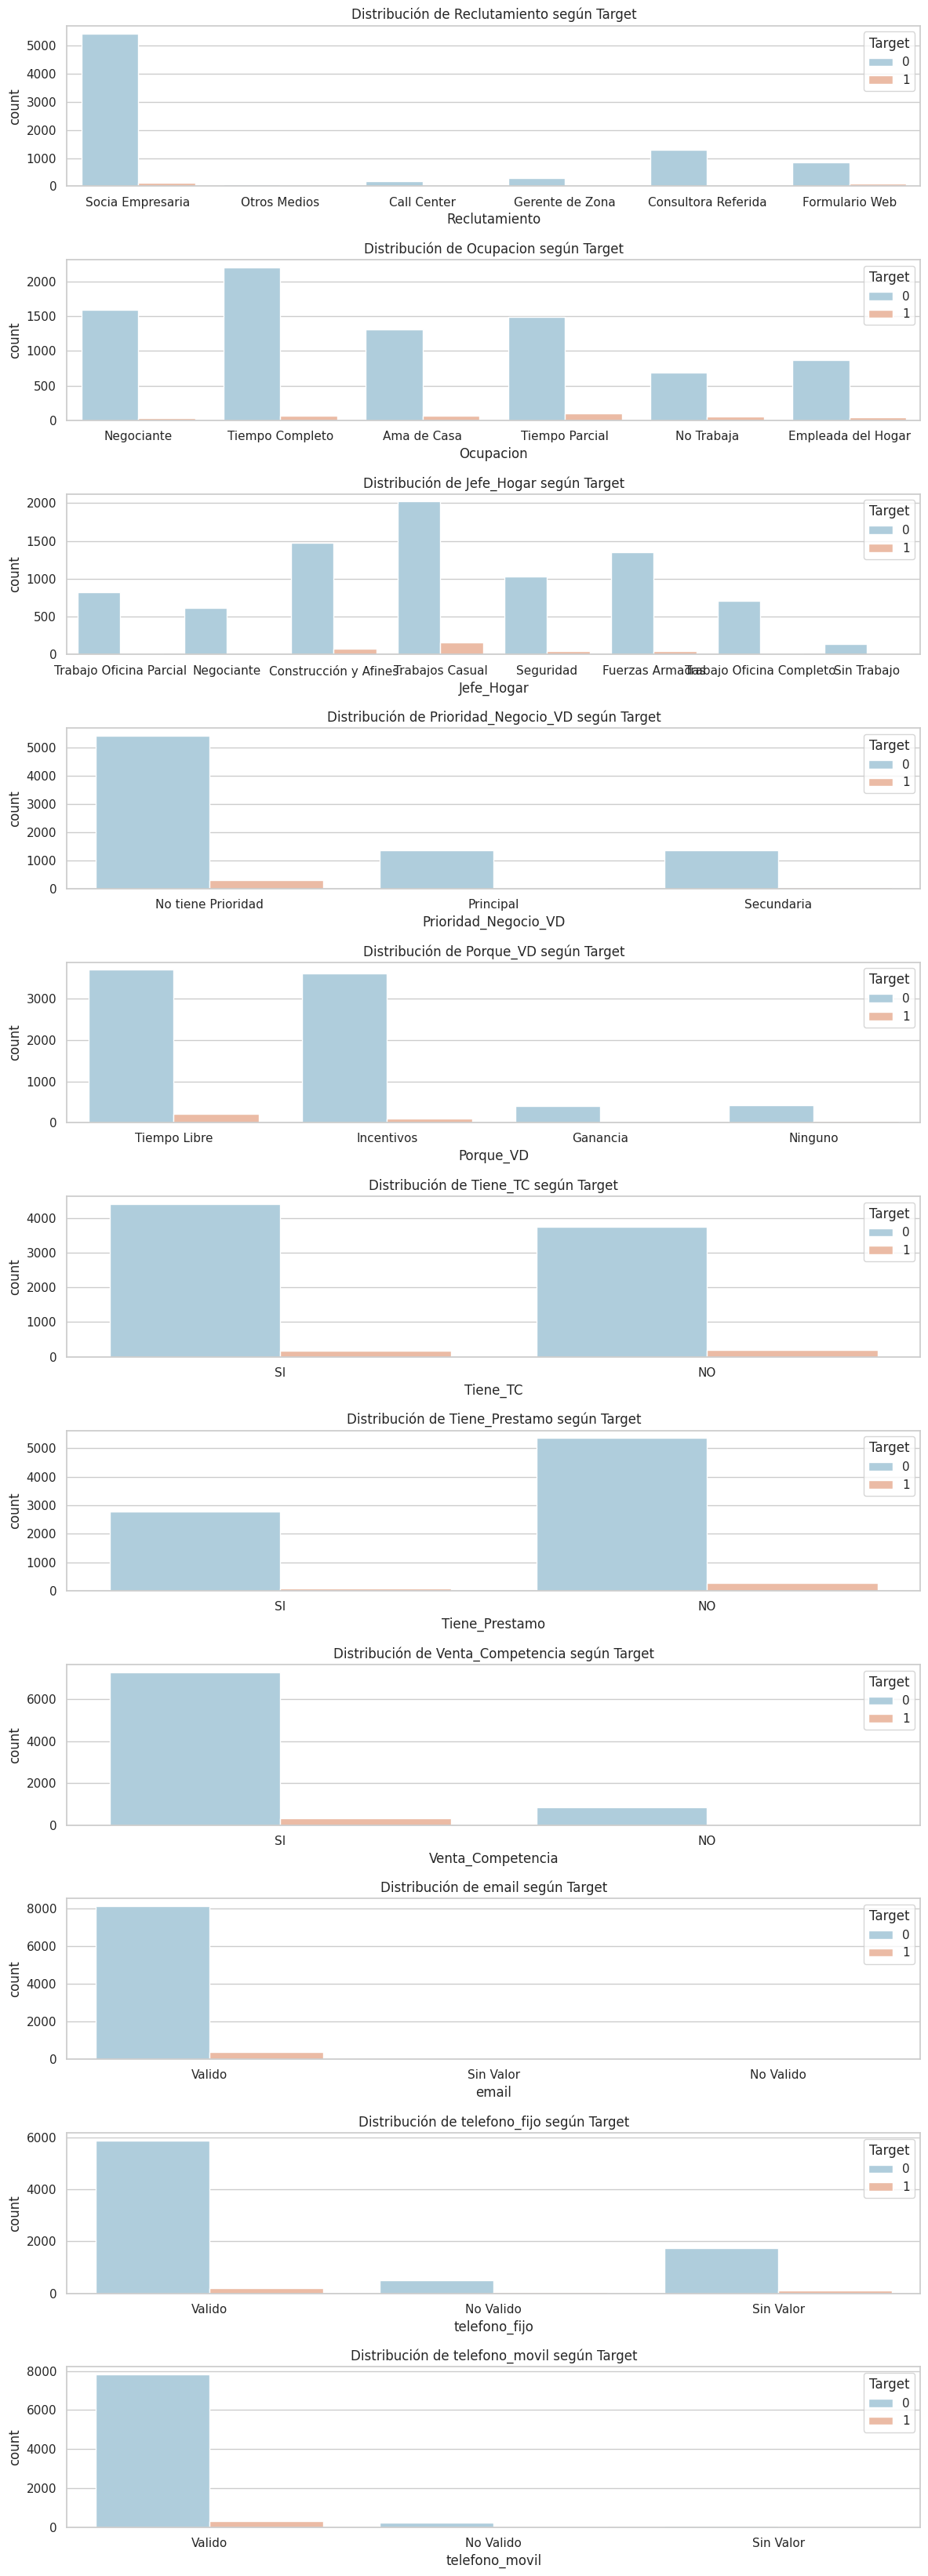

In [ ]:
# Variables
variables = X.columns.to_list()

# Ciclo
sns.set_style('whitegrid')
plt.figure(figsize=(12, 3 * len(variables)))

for i, variable in enumerate(variables):
    plt.subplot(len(variables), 1, i + 1)
    sns.countplot(x=variable, hue='Target', data=df, palette='RdBu_r')
    plt.title(f'Distribución de {variable} según Target')

plt.tight_layout()
plt.show()


                                             |          | [  0%]   00:00 -> (? left)


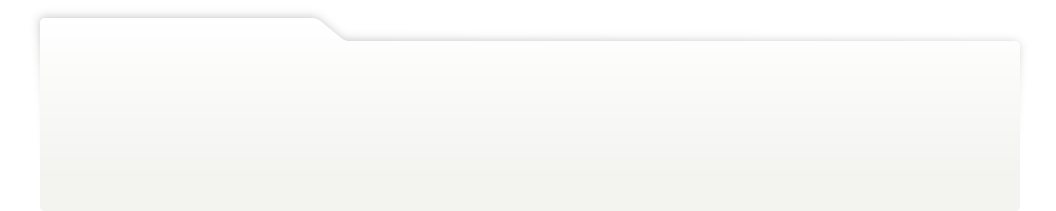
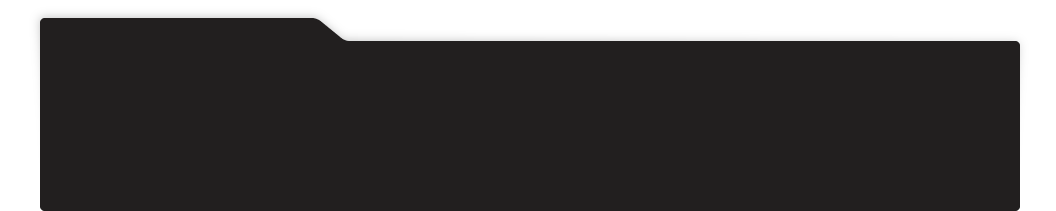
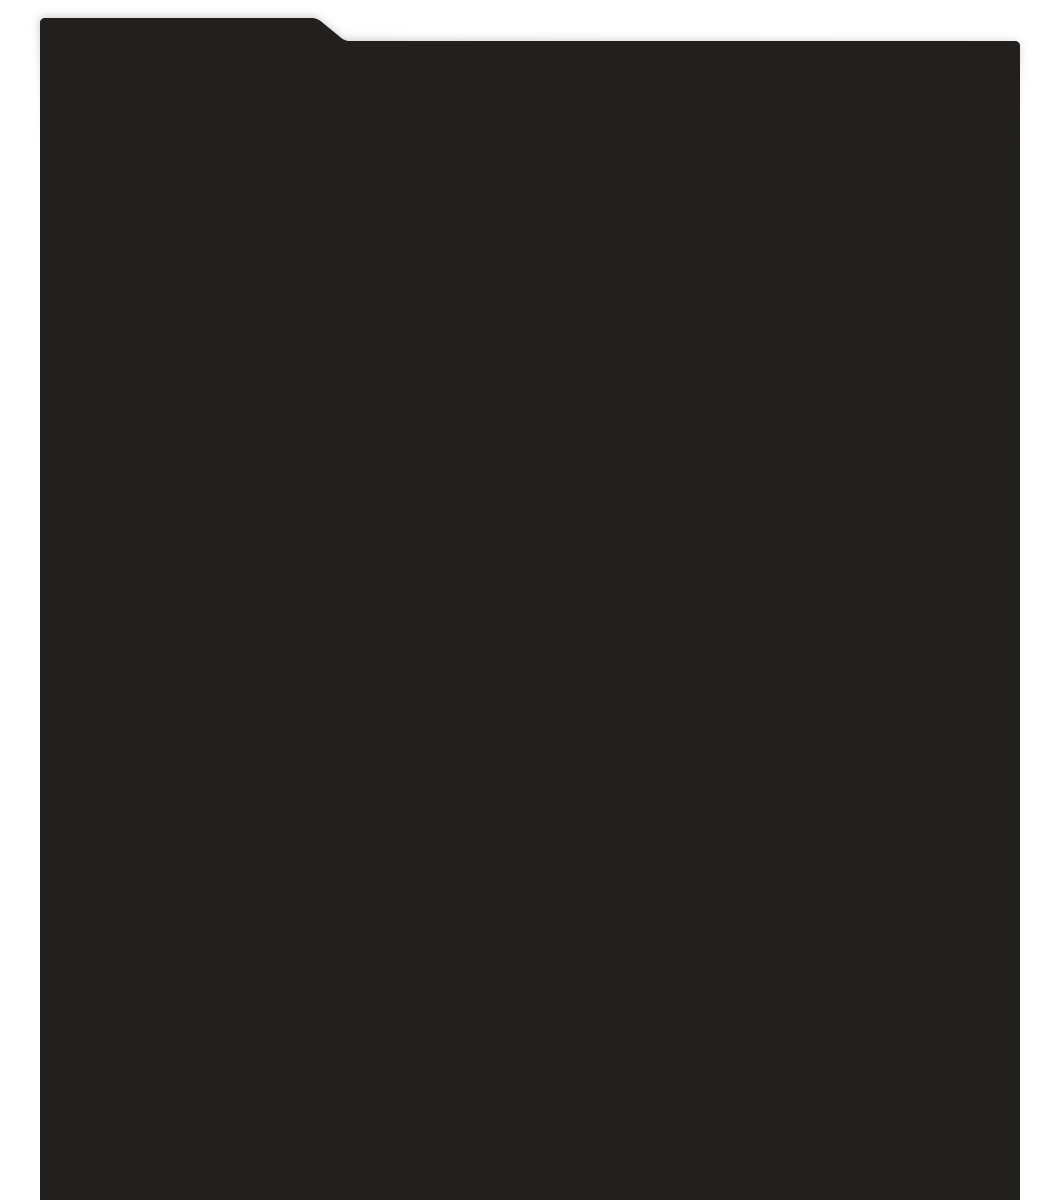
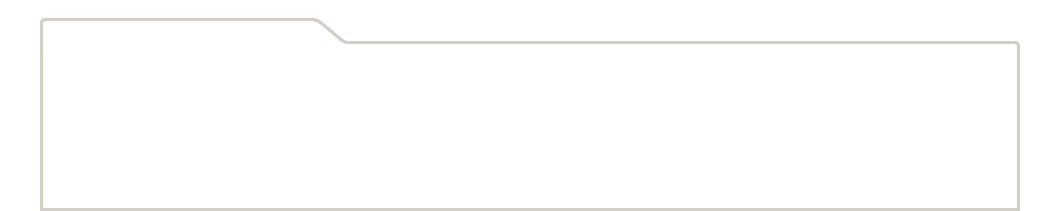
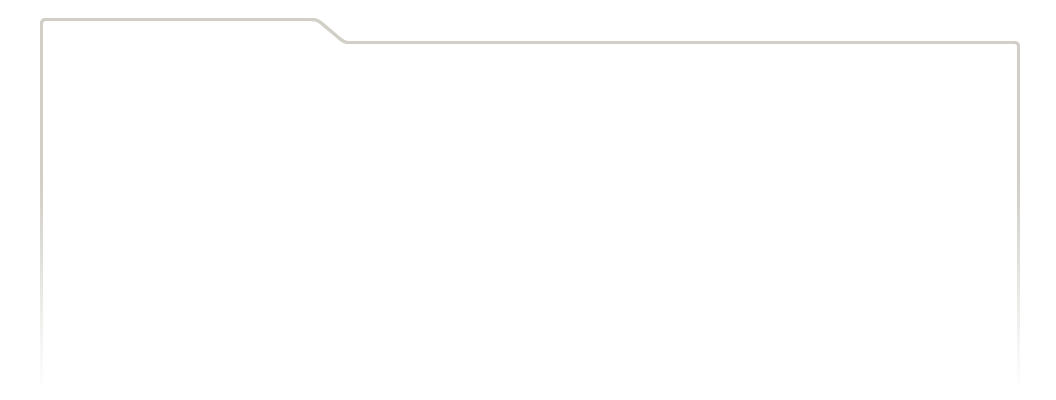
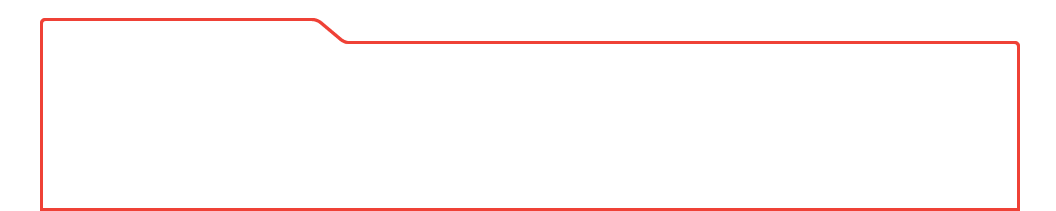
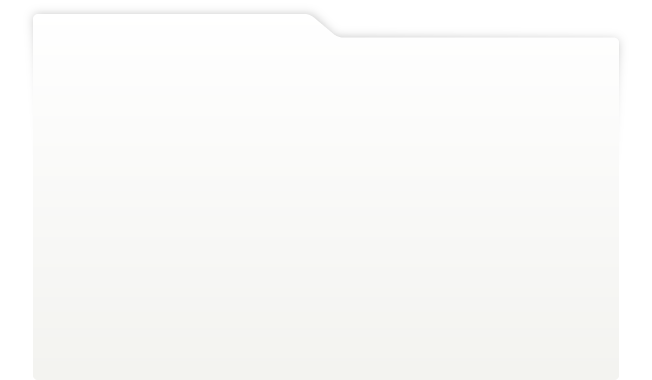
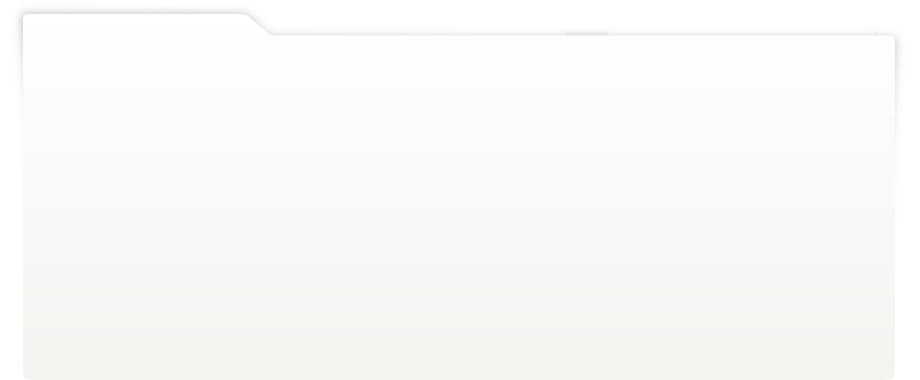
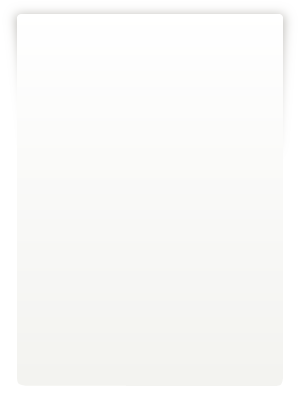
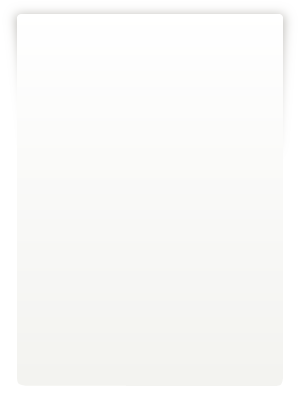
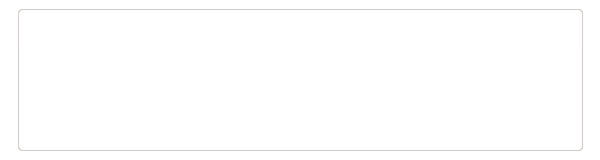
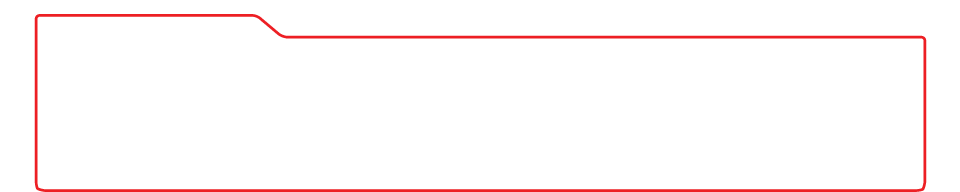
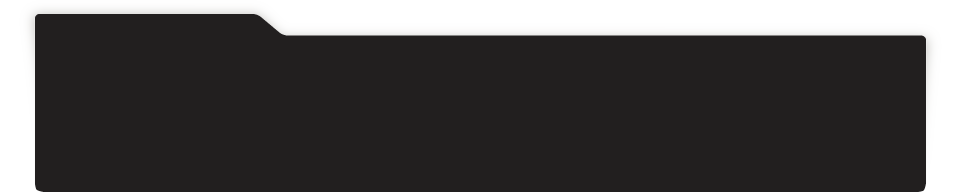
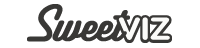
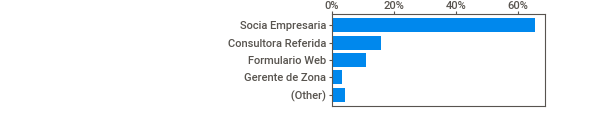
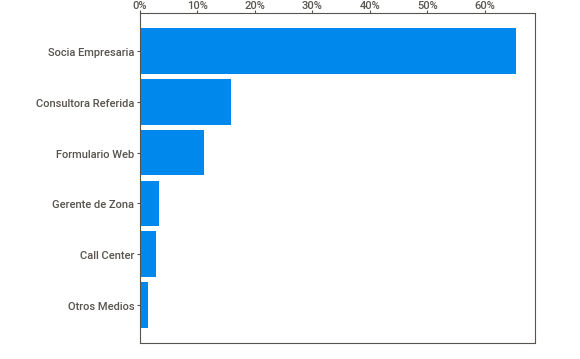
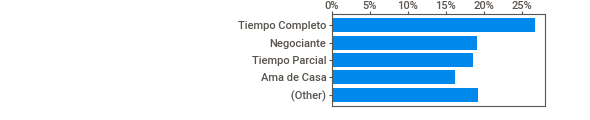
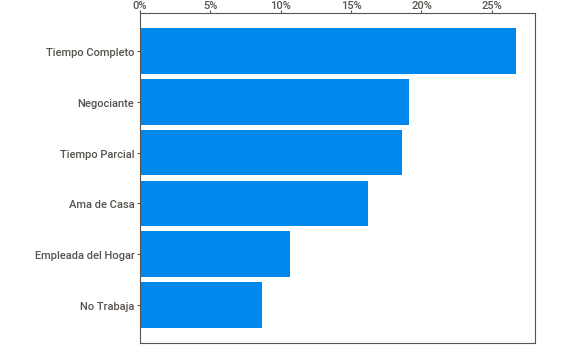
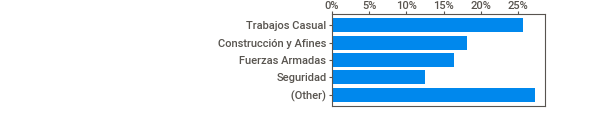
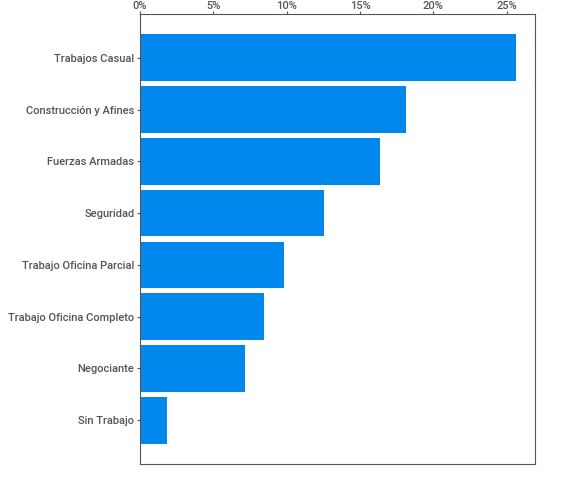
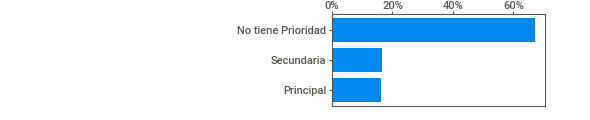
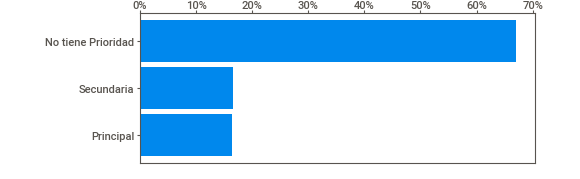
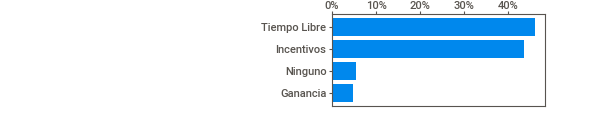
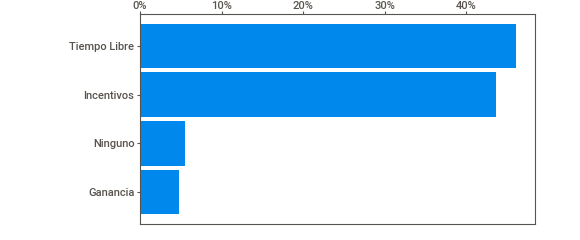
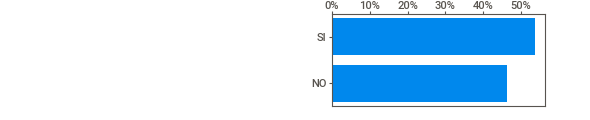
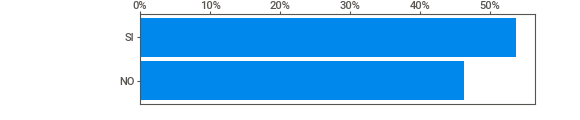
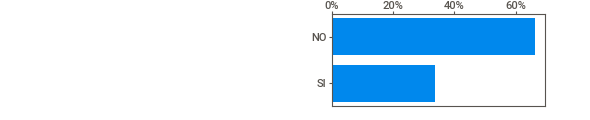
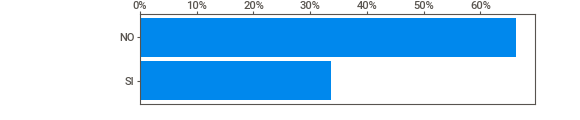
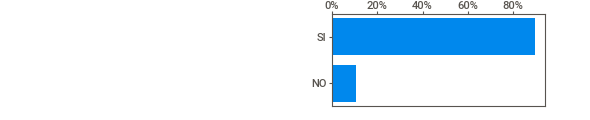
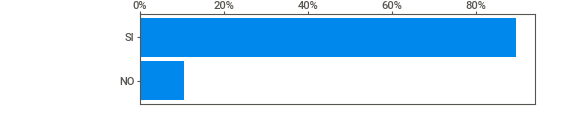
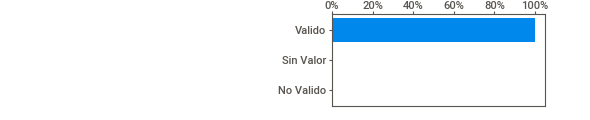
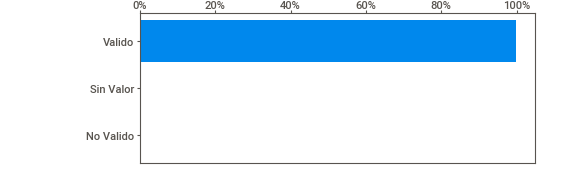
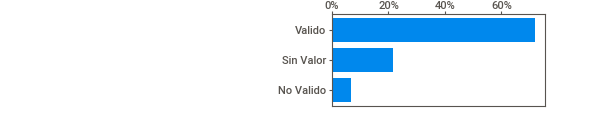
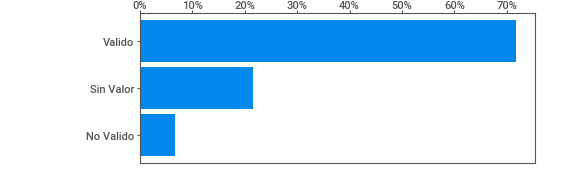
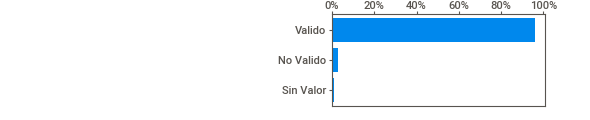
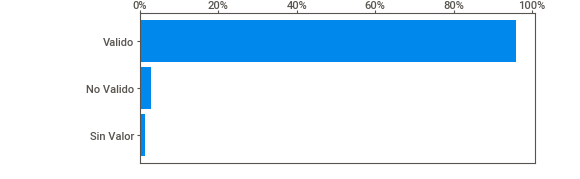
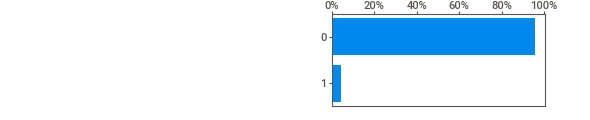
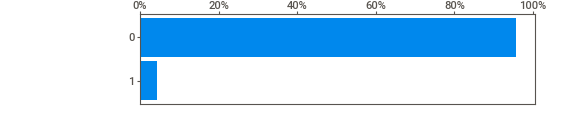
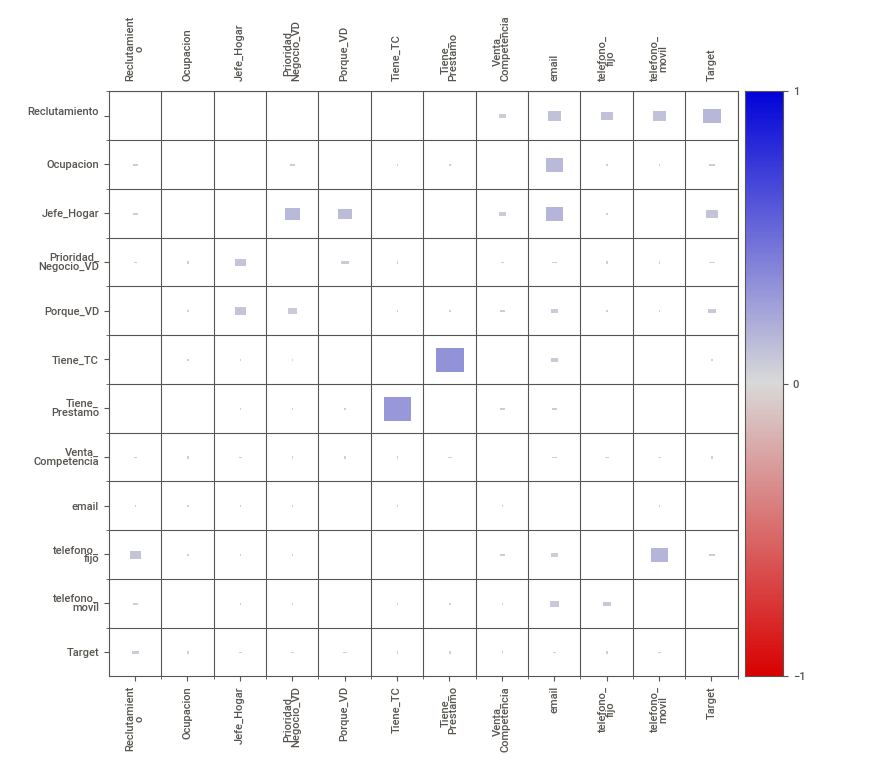
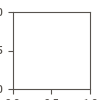

In [ ]:
sv.analyze(df).show_notebook(h ='full')

# BALANCEO DE DATOS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101,stratify=y)

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({0: 5696, 1: 254})


In [ ]:
#@title One Hot Encoding
# Codificar las variables categóricas con One-Hot Encoding
X_encoded = pd.get_dummies(X)

In [ ]:
#@title Train y test
# Train y test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=101, stratify=y)


In [ ]:
print(X_train.isnull().sum().sum())  # Debería ser 0

0


In [ ]:
#@title Balanceo
# Sobremuestreo con RandomOverSampler
os = RandomOverSampler(random_state=101)
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

In [ ]:
# Verificación del balanceo
counter = Counter(os_data_y)
print(counter)

Counter({0: 5696, 1: 5696})


In [ ]:
#@title Variables importantes
# Entrenar un modelo de Random Forest con 200 árboles y una semilla aleatoria 123
rf_clf = RandomForestClassifier(n_estimators=200, random_state=123)

# Entrenar el modelo con .fit
rf_clf.fit(os_data_X, os_data_y.ravel())

# Ordenando las mejores variables de mayor a menor generando un bucle para extraer
# los nombres de las columnas y la ganancia (Gain) de las variables más impactantes
features = []
for feature in zip(X_encoded.columns, rf_clf.feature_importances_):
    features.append(feature)

# Generar un dataframe para visualizar mejor lo que hizo Random Forest con su selector multivariado
features_total = pd.DataFrame(features, columns=['Variables', 'Gain']).sort_values('Gain', ascending=False)

# Mostrar el dataframe
print(features_total)

                                  Variables      Gain
5            Reclutamiento_Socia Empresaria  0.075762
2              Reclutamiento_Formulario Web  0.038612
10                Ocupacion_Tiempo Completo  0.037987
19               Jefe_Hogar_Trabajos Casual  0.036542
4                Reclutamiento_Otros Medios  0.034726
11                 Ocupacion_Tiempo Parcial  0.034338
38                     telefono_fijo_Valido  0.032968
13               Jefe_Hogar_Fuerzas Armadas  0.031567
24                     Porque_VD_Incentivos  0.031314
12         Jefe_Hogar_Construcción y Afines  0.031130
26                   Porque_VD_Tiempo Libre  0.030250
6                     Ocupacion_Ama de Casa  0.030087
27                              Tiene_TC_NO  0.029340
20  Prioridad_Negocio_VD_No tiene Prioridad  0.028941
28                              Tiene_TC_SI  0.028470
9                      Ocupacion_No Trabaja  0.028056
8                      Ocupacion_Negociante  0.026736
1         Reclutamiento_Cons

In [ ]:
#@title Selector de variables

# Utilizar SelectFromModel con los parámetros del modelo que se construyó y un threshold de 0.01
sfm = SelectFromModel(rf_clf, threshold=0.01)

# Entrenamiento del selector
sfm.fit(os_data_X, os_data_y)

# Construir una lista para quedarnos con las mejores variables
variables = []  # Lista vacía
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X_encoded.columns[feature_list_index])

# Mostrar las variables seleccionadas
print(variables)


['Reclutamiento_Call Center', 'Reclutamiento_Consultora Referida', 'Reclutamiento_Formulario Web', 'Reclutamiento_Gerente de Zona', 'Reclutamiento_Otros Medios', 'Reclutamiento_Socia Empresaria', 'Ocupacion_Ama de Casa', 'Ocupacion_Empleada del Hogar', 'Ocupacion_Negociante', 'Ocupacion_No Trabaja', 'Ocupacion_Tiempo Completo', 'Ocupacion_Tiempo Parcial', 'Jefe_Hogar_Construcción y Afines', 'Jefe_Hogar_Fuerzas Armadas', 'Jefe_Hogar_Negociante', 'Jefe_Hogar_Seguridad', 'Jefe_Hogar_Sin Trabajo', 'Jefe_Hogar_Trabajo Oficina Completo', 'Jefe_Hogar_Trabajo Oficina Parcial', 'Jefe_Hogar_Trabajos Casual', 'Prioridad_Negocio_VD_No tiene Prioridad', 'Prioridad_Negocio_VD_Principal', 'Prioridad_Negocio_VD_Secundaria', 'Porque_VD_Ganancia', 'Porque_VD_Incentivos', 'Porque_VD_Ninguno', 'Porque_VD_Tiempo Libre', 'Tiene_TC_NO', 'Tiene_TC_SI', 'Tiene_Prestamo_NO', 'Tiene_Prestamo_SI', 'Venta_Competencia_NO', 'Venta_Competencia_SI', 'telefono_fijo_No Valido', 'telefono_fijo_Sin Valor', 'telefono_fijo_

# OPTIMIZACIÓN DE MODELOS

## XGBOOST OPTIMIZADO

In [ ]:
#@title Grid Search with Cross Validation
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Número de árboles
n_estimators = [300, 400, 500]
# Porcentaje de variables con las que se construye un árbol
colsample_bytree = [0.7, 0.8, 0.9]
# Profundidad del árbol
max_depth = [4, 6, 8]
# Ratio de aprendizaje por cada árbol
learning_rate = [0.1, 0.15, 0.2]

# Creación del Grid Search o grilla generando un diccionario
param_grid = {'n_estimators': n_estimators,
              'colsample_bytree': colsample_bytree,
              'max_depth': max_depth,
              'learning_rate': learning_rate}

print(param_grid)

{'n_estimators': [300, 400, 500], 'colsample_bytree': [0.7, 0.8, 0.9], 'max_depth': [4, 6, 8], 'learning_rate': [0.1, 0.15, 0.2]}


In [ ]:
#@title Tunning de Parametros
# Definir la función para Grid Search
def gridSearchModels(model, param, X_train, y_train):
    clf_model = RandomizedSearchCV(model, param_distributions=param, scoring="accuracy", cv=5, return_train_score=True)
    # Fit probará todas las combinaciones
    clf_model.fit(X_train, y_train)
    # Mejor estimador y mejores parámetros
    print("-----------------------------------------------------------------------")
    print("Los parámetros optimizados son: ", clf_model.best_params_)
    print("-----------------------------------------------------------------------")
    print("La métrica en el entrenamiento es: ", clf_model.best_score_)
    return clf_model

In [ ]:
#@title Entrenamiento y optimización del modelo
import xgboost as xgb
# Entrenamiento y optimización del modelo
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
best_xgb_model = gridSearchModels(model_xgb, param_grid, os_data_X, os_data_y)

-----------------------------------------------------------------------
Los parámetros optimizados son:  {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 0.7}
-----------------------------------------------------------------------
La métrica en el entrenamiento es:  0.9438202991700763


In [ ]:
#@title Evaluación del modelo
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy}")

Accuracy en el conjunto de prueba: 0.8737254901960785


## CATBOOST OPTIMIZADO

In [ ]:
#@title Grid Search with Cross Validation
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Definir los parámetros del Grid Search
param_grid = {
    'iterations': [300, 400, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.15, 0.2],
    'colsample_bylevel': [0.7, 0.8, 0.9]
}

print(param_grid)

{'iterations': [300, 400, 500], 'depth': [4, 6, 8], 'learning_rate': [0.1, 0.15, 0.2], 'colsample_bylevel': [0.7, 0.8, 0.9]}


In [ ]:
#@title Tunning de Parametros
# Definir la función para Grid Search
def gridSearchModels(model, param, X_train, y_train):
    clf_model = RandomizedSearchCV(model, param_distributions=param, scoring="accuracy", cv=5, return_train_score=True)
    # Fit probará todas las combinaciones
    clf_model.fit(X_train, y_train)
    # Mejor estimador y mejores parámetros
    print("-----------------------------------------------------------------------")
    print("Los parámetros optimizados son: ", clf_model.best_params_)
    print("-----------------------------------------------------------------------")
    print("La métrica en el entrenamiento es: ", clf_model.best_score_)
    return clf_model

In [ ]:
#@title Entrenamiento y optimización del modelo
from catboost import CatBoostClassifier
# Entrenamiento y optimización del modelo
model_cat = CatBoostClassifier(verbose=0)
best_cat_model = gridSearchModels(model_cat, param_grid, os_data_X, os_data_y)

-----------------------------------------------------------------------
Los parámetros optimizados son:  {'learning_rate': 0.2, 'iterations': 400, 'depth': 8, 'colsample_bylevel': 0.7}
-----------------------------------------------------------------------
La métrica en el entrenamiento es:  0.9459266787144216


In [ ]:
#@title Evaluación del modelo
y_pred = best_cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy}")

Accuracy en el conjunto de prueba: 0.88


## LIGHTGBM OPTIMIZADO

In [ ]:
#@title Grid Search with Cross Validation
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Definir los parámetros del Grid Search
param_grid = {
    'n_estimators': [300, 400, 500],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.1, 0.15, 0.2],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

print(param_grid)

{'n_estimators': [300, 400, 500], 'num_leaves': [31, 50, 70], 'learning_rate': [0.1, 0.15, 0.2], 'colsample_bytree': [0.7, 0.8, 0.9]}


In [ ]:
#@title Tunning de Parametros
# Definir la función para Grid Search
def gridSearchModels(model, param, X_train, y_train):
    clf_model = RandomizedSearchCV(model, param_distributions=param, scoring="accuracy", cv=5, return_train_score=True)
    # Fit probará todas las combinaciones
    clf_model.fit(X_train, y_train)
    # Mejor estimador y mejores parámetros
    print("-----------------------------------------------------------------------")
    print("Los parámetros optimizados son: ", clf_model.best_params_)
    print("-----------------------------------------------------------------------")
    print("La métrica en el entrenamiento es: ", clf_model.best_score_)
    return clf_model

In [ ]:
#@title Entrenamiento y optimización del modelo
model_lgb = lgb.LGBMClassifier()
best_lgb_model = gridSearchModels(model_lgb, param_grid, os_data_X, os_data_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4557, number of negative: 4556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 9113, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500055 -> initscore=0.000219
[LightGBM] [Info] Start training from score 0.000219
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4556, number of negative: 4557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

In [ ]:
#@title Evaluación del modelo
y_pred = best_lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy}")

Accuracy en el conjunto de prueba: 0.8772549019607843


## GRADIENTE BOOSTING OPTIMIZADO

In [ ]:
#@title Grid Search with Cross Validation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Definir los parámetros del Grid Search
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.1, 0.15, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

print(param_grid)

{'n_estimators': [300, 400, 500], 'max_depth': [4, 6, 8], 'learning_rate': [0.1, 0.15, 0.2], 'subsample': [0.7, 0.8, 0.9]}


In [ ]:
#@title Tunning de Parametros
# Definir la función para Grid Search
def gridSearchModels(model, param, X_train, y_train):
    clf_model = RandomizedSearchCV(model, param_distributions=param, scoring="accuracy", cv=5, return_train_score=True)
    # Fit probará todas las combinaciones
    clf_model.fit(X_train, y_train)
    # Mejor estimador y mejores parámetros
    print("-----------------------------------------------------------------------")
    print("Los parámetros optimizados son: ", clf_model.best_params_)
    print("-----------------------------------------------------------------------")
    print("La métrica en el entrenamiento es: ", clf_model.best_score_)
    return clf_model

In [ ]:
#@title Entrenamiento y optimización del modelo
model_gb = GradientBoostingClassifier()
best_gb_model = gridSearchModels(model_gb, param_grid, os_data_X, os_data_y)

-----------------------------------------------------------------------
Los parámetros optimizados son:  {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.15}
-----------------------------------------------------------------------
La métrica en el entrenamiento es:  0.9486480176871623


In [ ]:
#@title Evaluación del modelo
y_pred = best_gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy}")

Accuracy en el conjunto de prueba: 0.8807843137254902


# EMSAMBLADO DE MODELOS

## STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

# Definir los modelos base
estimators = [
    ('catboost', CatBoostClassifier(verbose=0, **best_cat_model.best_params_)),
    ('lightgbm', lgb.LGBMClassifier(**best_lgb_model.best_params_)),
    ('gradientboosting', GradientBoostingClassifier(**best_gb_model.best_params_))
]

In [ ]:
# Definir el modelo meta
meta_model = LogisticRegression()

# Crear el ensamblado utilizando StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model)

In [ ]:
# Entrenar el ensamblado
stacking_clf.fit(os_data_X, os_data_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5696, number of negative: 5696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 11392, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4557, number of negative: 4556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 78
[LightGBM] [In

StackingClassifier(estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7e9bad678c10>),
                               ('lightgbm',
                                LGBMClassifier(colsample_bytree=0.9,
                                               learning_rate=0.2,
                                               n_estimators=400,
                                               num_leaves=70)),
                               ('gradientboosting',
                                GradientBoostingClassifier(learning_rate=0.15,
                                                           max_depth=8,
                                                           n_estimators=400,
                                                           subsample=0.8))],
                   final_estimator=LogisticRegression())

In [ ]:
# Evaluar el ensamblado en el conjunto de prueba
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del ensamblado (Stacking) en el conjunto de prueba: {accuracy}")

Accuracy del ensamblado (Stacking) en el conjunto de prueba: 0.8929411764705882


## BOOSTING DE MODELO BASE

Modelo base: Gradiente Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Utilizar GradientBoostingClassifier como el modelo base
base_model = GradientBoostingClassifier(**best_gb_model.best_params_)

In [ ]:
# Crear el modelo de AdaBoost con el modelo base
boosting_clf = AdaBoostClassifier(base_model, n_estimators=50, random_state=101)

In [ ]:
# Entrenar el ensamblado
boosting_clf.fit(os_data_X, os_data_y)

AdaBoostClassifier(estimator=GradientBoostingClassifier(learning_rate=0.15,
                                                        max_depth=8,
                                                        n_estimators=400,
                                                        subsample=0.8),
                   random_state=101)

In [ ]:
# Evaluar el ensamblado en el conjunto de prueba
y_pred = boosting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del ensamblado (Boosting) en el conjunto de prueba: {accuracy}")

Accuracy del ensamblado (Boosting) en el conjunto de prueba: 0.8819607843137255


Modelo base: CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Definir el modelo base con los mejores parámetros encontrados
base_model = CatBoostClassifier(verbose=0, **best_cat_model.best_params_)

# Número de modelos en el ensamblado
n_models = 50

# Inicializar los pesos de las muestras
sample_weights = np.ones(len(os_data_y)) / len(os_data_y)

# Crear una lista para almacenar los modelos entrenados
models = []
model_weights = []

# Entrenar el ensamblado
for i in range(n_models):
    model = CatBoostClassifier(verbose=0, **best_cat_model.best_params_)
    model.fit(os_data_X, os_data_y, sample_weight=sample_weights)

    # Predicciones del modelo
    predictions = model.predict(os_data_X)

    # Calcular el error del modelo
    incorrect = (predictions != os_data_y)
    model_error = np.dot(sample_weights, incorrect) / np.sum(sample_weights)

    # Calcular el peso del modelo
    model_weight = np.log((1 - model_error) / (model_error + 1e-10)) + np.log(len(os_data_y) - 1)
    model_weights.append(model_weight)

    # Actualizar los pesos de las muestras
    sample_weights *= np.exp(model_weight * incorrect)
    sample_weights /= np.sum(sample_weights)

    # Almacenar el modelo
    models.append(model)


In [ ]:
# Realizar predicciones en el conjunto de prueba utilizando el ensamblado
def ensemble_predict(models, model_weights, X):
    model_preds = np.array([model.predict(X) for model in models])
    weighted_preds = np.tensordot(model_weights, model_preds, axes=(0, 0))
    return np.sign(weighted_preds)

In [ ]:
# Evaluar el ensamblado en el conjunto de prueba
y_pred = ensemble_predict(models, model_weights, X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del ensamblado (Boosting con CatBoost) en el conjunto de prueba: {accuracy}")

Accuracy del ensamblado (Boosting con CatBoost) en el conjunto de prueba: 0.14627450980392157


## VOTING

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

# Definir los modelos base con los mejores parámetros encontrados
catboost_model = CatBoostClassifier(verbose=0, **best_cat_model.best_params_)
lightgbm_model = lgb.LGBMClassifier(**best_lgb_model.best_params_)
gradientboosting_model = GradientBoostingClassifier(**best_gb_model.best_params_)

In [ ]:
# Crear el ensamblado utilizando VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('catboost', catboost_model),
    ('lightgbm', lightgbm_model),
    ('gradientboosting', gradientboosting_model)
], voting='soft')  # 'soft' para utilizar las probabilidades de predicción

In [ ]:
# Entrenar el ensamblado
voting_clf.fit(os_data_X, os_data_y)

[LightGBM] [Info] Number of positive: 5696, number of negative: 5696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 11392, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x783081a261a0>),
                             ('lightgbm',
                              LGBMClassifier(colsample_bytree=0.9,
                                             learning_rate=0.2,
                                             n_estimators=400, num_leaves=50)),
                             ('gradientboosting',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         max_depth=8,
                                                         n_estimators=300,
                                                         subsample=0.8))],
                 voting='soft')

In [ ]:
# Evaluar el ensamblado en el conjunto de prueba
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del ensamblado (Voting) en el conjunto de prueba: {accuracy}")

Accuracy del ensamblado (Voting) en el conjunto de prueba: 0.8654901960784314


## BAGING

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Definir los modelos optimizados
catboost_model = CatBoostClassifier(verbose=0, **best_cat_model.best_params_)
lightgbm_model = lgb.LGBMClassifier(**best_lgb_model.best_params_)
gradientboosting_model = GradientBoostingClassifier(**best_gb_model.best_params_)

In [ ]:
# Crear el ensamblado utilizando BaggingClassifier
bagging_clf_catboost = BaggingClassifier(base_estimator=catboost_model, n_estimators=10, random_state=42)
bagging_clf_lightgbm = BaggingClassifier(base_estimator=lightgbm_model, n_estimators=10, random_state=42)
bagging_clf_gradientboosting = BaggingClassifier(base_estimator=gradientboosting_model, n_estimators=10, random_state=42)

In [ ]:
# Entrenar los modelos de Bagging
bagging_clf_catboost.fit(os_data_X, os_data_y)
bagging_clf_lightgbm.fit(os_data_X, os_data_y)
bagging_clf_gradientboosting.fit(os_data_X, os_data_y)

[LightGBM] [Info] Number of positive: 5696, number of negative: 5696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 11392, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493680 -> initscore=-0.025282
[LightGBM] [Info] Start training from score -0.025282
[LightGBM] [Info] Number of positive: 5696, number of negative: 5696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 11392, number of used features: 10
[LightGBM] [Info] [binary:

In [ ]:
# Predicciones usando un promedio ponderado
def bagging_predict(models, X):
    predictions = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        predictions[:, i] = model.predict_proba(X)[:, 1]
    return (predictions.mean(axis=1) > 0.5).astype(int)

In [ ]:
# Evaluar el ensamblado en el conjunto de prueba
models = [bagging_clf_catboost, bagging_clf_lightgbm, bagging_clf_gradientboosting]
y_pred = bagging_predict(models, X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del ensamblado (Bagging) en el conjunto de prueba: {accuracy}")

Accuracy del ensamblado (Bagging) en el conjunto de prueba: 0.8615686274509804


## BLENDING

In [ ]:
# Entrenar los modelos en el conjunto de entrenamiento con los mejores parámetros
catboost_model = CatBoostClassifier(verbose=0, **best_cat_model.best_params_)
lightgbm_model = lgb.LGBMClassifier(**best_lgb_model.best_params_)
gradientboosting_model = GradientBoostingClassifier(**best_gb_model.best_params_)

In [ ]:
# Entrenar los modelos
catboost_model.fit(os_data_X, os_data_y)
lightgbm_model.fit(os_data_X, os_data_y)
gradientboosting_model.fit(os_data_X, os_data_y)

[LightGBM] [Info] Number of positive: 5696, number of negative: 5696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 11392, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


GradientBoostingClassifier(learning_rate=0.2, max_depth=8, n_estimators=300,
                           subsample=0.8)

In [ ]:
# Obtener las predicciones finales en el conjunto de prueba
pred_catboost_test = catboost_model.predict_proba(X_test)[:, 1]
pred_lightgbm_test = lightgbm_model.predict_proba(X_test)[:, 1]
pred_gradientboosting_test = gradientboosting_model.predict_proba(X_test)[:, 1]

In [ ]:
# Combinar las predicciones usando un promedio
blend_pred_test = (pred_catboost_test + pred_lightgbm_test + pred_gradientboosting_test) / 3
blend_pred_class_test = (blend_pred_test > 0.5).astype(int)

In [ ]:
# Evaluar la combinación en el conjunto de prueba
accuracy = accuracy_score(y_test, blend_pred_class_test)
print(f"Accuracy del ensamblado (Blending) en el conjunto de prueba: {accuracy}")

Accuracy del ensamblado (Blending) en el conjunto de prueba: 0.8654901960784314


# METRICAS

## TECNICAS DE CLASIFICACIÓN

In [ ]:
# Predecir las etiquetas para obtener las métricas adicionales
y_pred = stacking_clf.predict(X_test)

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calcular la recuperación (recall)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calcular la puntuación F1 (F1-score)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calcular ROC UAC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

# Calcular el coeficiente de Gini
gini = 2 * roc_auc - 1
print(f"Gini Coefficient: {gini}")

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Precision: 0.10194174757281553
Recall: 0.1926605504587156
F1 Score: 0.13333333333333333
ROC AUC: 0.5584359696169039
Gini Coefficient: 0.11687193923380779
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2441
           1       0.10      0.19      0.13       109

    accuracy                           0.89      2550
   macro avg       0.53      0.56      0.54      2550
weighted avg       0.93      0.89      0.91      2550



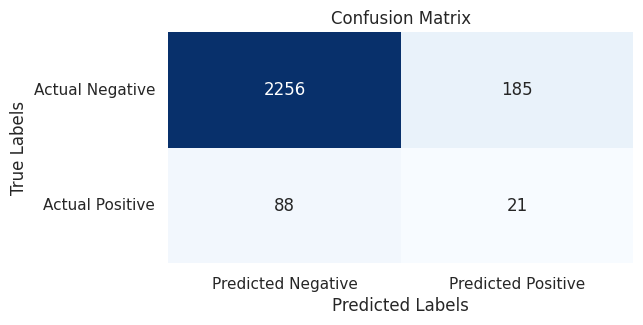

In [ ]:
# Matriz de confusión Test

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# PROBANDO CON DATA SIMULADA

In [ ]:
# Data simulada con la misma estructura que X_encoded(Codificada)
# Obtener las características
feature_columns = X_encoded.columns

# 10 nuevas muestras de datos simulados
np.random.seed(101)
new_data_simulated = pd.DataFrame(np.random.rand(10, len(feature_columns)),
                                  columns=feature_columns)
new_data_simulated.head()

# Predicciones utilizando el modelo de Stacking
predictions = stacking_clf.predict(new_data_simulated)

print(f"Predicciones para la nueva data simulada:\n{predictions}")

Predicciones para la nueva data simulada:
[1 0 0 0 0 0 0 1 1 0]


In [ ]:
# Nueva data simulada
nueva_data_varied = pd.DataFrame({
    'Reclutamiento': ['Socia Empresaria', 'Socia Empresaria', 'Socia Empresaria', 'Otros Medios', 'Socia Empresaria', 'Socia Empresaria', 'Socia Empresaria', 'Call Center', 'Socia Empresaria', 'Gerente de Zona'],
    'Ocupacion': ['Negociante', 'Tiempo Completo', 'Tiempo Completo', 'Ama de Casa', 'Ama de Casa', 'Ama de Casa', 'Ama de Casa', 'Ama de Casa', 'Tiempo Completo', 'Tiempo Parcial'],
    'Jefe_Hogar': ['Trabajo Oficina Parcial', 'Negociante', 'Negociante', 'Construcción y Afines', 'Trabajos Casual', 'Seguridad', 'Seguridad', 'Negociante', 'Fuerzas Armadas', 'Trabajo Oficina Parcial'],
    'Prioridad_Negocio_VD': ['No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad'],
    'Porque_VD': ['Tiempo Libre', 'Incentivos', 'Ganancia', 'Tiempo Libre', 'Tiempo Libre', 'Tiempo Libre', 'Tiempo Libre', 'Incentivos', 'Tiempo Libre', 'Incentivos'],
    'Tiene_TC': ['SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI'],
    'Tiene_Prestamo': ['SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI'],
    'Venta_Competencia': ['SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI'],
    'email': ['Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido'],
    'telefono_fijo': ['Valido', 'Valido', 'No Valido', 'Valido', 'No Valido', 'Sin Valor', 'Valido', 'Valido', 'No Valido', 'Valido'],
    'telefono_movil': ['Valido', 'Valido', 'Valido', 'No Valido', 'Valido', 'Valido', 'Valido', 'No Valido', 'Valido', 'No Valido']
})


# Aplicar el mismo One-Hot Encoder a la nueva data
nueva_data_varied_encoded = pd.get_dummies(nueva_data_varied)

# Asegurarse de que las columnas coincidan
nueva_data_varied_encoded = nueva_data_varied_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Realizar predicciones con el modelo de Stacking
predicciones_varied = stacking_clf.predict(nueva_data_varied_encoded)

# Mostrar las predicciones
print(f"Predicciones para la nueva data variada:\n{predicciones_varied}")


Predicciones para la nueva data variada:
[0 0 0 0 0 0 0 0 0 0]


# MEJORAS DEL MODELO

1. Verificar el Balance de Clases en el Conjunto de Prueba

In [ ]:
print("Distribución de clases en el conjunto de prueba:")
print(Counter(y_test))

Distribución de clases en el conjunto de prueba:
Counter({0: 2441, 1: 109})


2. Reentrenar los Modelos Base con Parámetros Diferentes

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

param_grid = {
    'iterations': [300, 400, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.15, 0.2],
    'colsample_bylevel': [0.7, 0.8, 0.9]
}

catboost_model = CatBoostClassifier(verbose=0)
catboost_random_search = RandomizedSearchCV(catboost_model, param_distributions=param_grid, scoring='accuracy', cv=5, return_train_score=True)
catboost_random_search.fit(os_data_X, os_data_y)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x783089eeddb0>,
                   param_distributions={'colsample_bylevel': [0.7, 0.8, 0.9],
                                        'depth': [4, 6, 8],
                                        'iterations': [300, 400, 500],
                                        'learning_rate': [0.1, 0.15, 0.2]},
                   return_train_score=True, scoring='accuracy')

In [ ]:
best_cat_model = catboost_random_search.best_estimator_

3. Evaluar la Importancia de Características

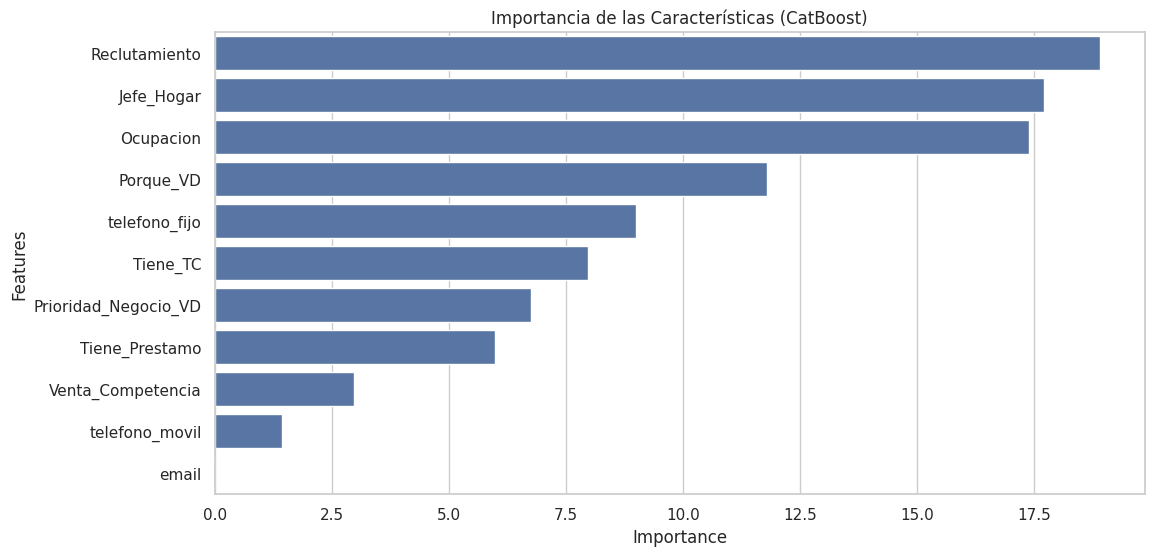

In [ ]:
feature_importances = best_cat_model.feature_importances_
features = os_data_X.columns

# Crear un DataFrame para las importancias
importances_df = pd.DataFrame({
    'Features': features,
    'Importance': feature_importances
})

# Ordenar por importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Features', data=importances_df)
plt.title('Importancia de las Características (CatBoost)')
plt.show()

4. Ajustar el Modelo Meta

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Definir los modelos base
estimators = [
    ('catboost', best_cat_model),
    ('lightgbm', best_lgb_model),
    ('gradientboosting', best_gb_model)
]

# Probar diferentes modelos meta
meta_model = SVC(probability=True)

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model)
stacking_clf.fit(os_data_X, os_data_y)

[LightGBM] [Info] Number of positive: 4557, number of negative: 4556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 9113, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500055 -> initscore=0.000219
[LightGBM] [Info] Start training from score 0.000219
[LightGBM] [Info] Number of positive: 4556, number of negative: 4557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 9113, number of used features: 10
[LightGBM] [Info] [binary:Boos

StackingClassifier(estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7830885c3d60>),
                               ('lightgbm',
                                RandomizedSearchCV(cv=5,
                                                   estimator=LGBMClassifier(),
                                                   param_distributions={'colsample_bytree': [0.7,
                                                                                             0.8,
                                                                                             0.9],
                                                                        'learning_rate': [0.1,
                                                                                          0.15,
                                                                                          0.2],
                                                                        'n_estimators': [300,
                                                                                         400,
                                                                                         500],
                                                                        'num_leaves': [31,
                                                                                       50,
                                                                                       70]},
                                                   return_train_score=True,
                                                   scoring='accuracy')),
                               ('gradientboosting',
                                RandomizedSearchCV(cv=5,
                                                   estimator=GradientBoostingClassifier(),
                                                   param_distributions={'learning_rate': [0.1,
                                                                                          0.15,
                                                                                          0.2],
                                                                        'max_depth': [4,
                                                                                      6,
                                                                                      8],
                                                                        'n_estimators': [300,
                                                                                         400,
                                                                                         500],
                                                                        'subsample': [0.7,
                                                                                      0.8,
                                                                                      0.9]},
                                                   return_train_score=True,
                                                   scoring='accuracy'))],
                   final_estimator=SVC(probability=True))

In [ ]:
# Evaluar el ensamblado en el conjunto de prueba
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del ensamblado (Stacking) en el conjunto de prueba: {accuracy}")

Accuracy del ensamblado (Stacking) en el conjunto de prueba: 0.8674509803921568


5. Predicciones con nueva data

In [ ]:
# Nueva data simulada
nueva_data_varied = pd.DataFrame({
    'Reclutamiento': ['Socia Empresaria', 'Socia Empresaria', 'Socia Empresaria', 'Otros Medios', 'Socia Empresaria', 'Socia Empresaria', 'Socia Empresaria', 'Call Center', 'Socia Empresaria', 'Gerente de Zona'],
    'Ocupacion': ['Negociante', 'Tiempo Completo', 'Tiempo Completo', 'Ama de Casa', 'Ama de Casa', 'Ama de Casa', 'Ama de Casa', 'Ama de Casa', 'Tiempo Completo', 'Tiempo Parcial'],
    'Jefe_Hogar': ['Trabajo Oficina Parcial', 'Negociante', 'Negociante', 'Construcción y Afines', 'Trabajos Casual', 'Seguridad', 'Seguridad', 'Negociante', 'Fuerzas Armadas', 'Trabajo Oficina Parcial'],
    'Prioridad_Negocio_VD': ['No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad', 'No tiene Prioridad'],
    'Porque_VD': ['Tiempo Libre', 'Incentivos', 'Ganancia', 'Tiempo Libre', 'Tiempo Libre', 'Tiempo Libre', 'Tiempo Libre', 'Incentivos', 'Tiempo Libre', 'Incentivos'],
    'Tiene_TC': ['SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'SI', 'SI', 'SI', 'SI'],
    'Tiene_Prestamo': ['SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI'],
    'Venta_Competencia': ['SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI'],
    'email': ['Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido', 'Valido'],
    'telefono_fijo': ['Valido', 'Valido', 'No Valido', 'Valido', 'No Valido', 'Sin Valor', 'Valido', 'Valido', 'No Valido', 'Valido'],
    'telefono_movil': ['Valido', 'Valido', 'Valido', 'No Valido', 'Valido', 'Valido', 'Valido', 'No Valido', 'Valido', 'No Valido']
})

# Aplicar el mismo One-Hot Encoder a la nueva data
nueva_data_varied_encoded = pd.get_dummies(nueva_data_varied)

# Asegurarse de que las columnas coincidan
nueva_data_varied_encoded = nueva_data_varied_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Realizar predicciones con el modelo de Stacking
predicciones_varied = stacking_clf.predict(nueva_data_varied_encoded)

# Mostrar las predicciones
print(f"Predicciones para la nueva data variada:\n{predicciones_varied}")


Predicciones para la nueva data variada:
[0 0 0 0 0 0 0 0 0 0]
